# Introduction

I am using employee records from an organization, specifically from a database that includes details such as department, division, gender, base salary, overtime pay, longevity pay, and grade. This dataset is structured and likely sourced from the organization's human resources information system (HRIS) or a similar employee management system.

The primary research question I aim to address with this dataset is: **Are there any disparities in pay and roles based on gender within the organization?** To probe this question, the dataset will be utilized to perform comparative analyses on several fronts:

*Pay Disparity Analysis:* Evaluating whether there is a significant difference in base pay between male and female employees across various divisions and grades within the organization.

*Role Disparity Analysis:* Examining the distribution of roles between male and female employees to see if certain grades, which may correspond to levels of responsibility or job titles, are disproportionately occupied by one gender.

In essence, this analysis is expected to shed light on the state of gender equality within the organization, contributing to a broader understanding of workplace diversity and inclusion. The outcomes may reveal critical insights that could inform policy changes, training programs, or further investigations to ensure fair treatment and opportunities for all employees regardless of gender.

# Data Summary

The dataset is acquired from [data.gov](https://catalog.data.gov/dataset/employee-salaries-2023), which provides open access to government data.

**Use Cases:**
The dataset provides multiple use cases, particularly in the domain of HR analytics and organizational research. Some potential use cases include:

*Gender Pay Gap Analysis:* To investigate disparities in compensation between male and female employees.

*Diversity and Inclusion Assessment:* To evaluate the gender composition across different levels and roles within the organization.
Human Resource Planning: To aid in understanding trends for future hiring and promotion practices, ensuring equal opportunities for all genders.

**Dataset Attributes:**

Department: Categorical data indicating the department of the employee.

Division: Categorical data specifying the division within the department.

Gender: Categorical data representing the gender of the employee (e.g., Male, Female).

Base Salary: Numeric data reflecting the base pay of the employee.

Overtime Pay: Numeric data showing compensation for overtime work.

Longevity Pay: Numeric data representing additional pay that might increase with the employee's tenure.

Grade: Categorical or ordinal data that could signify the rank or level of the employee within the organization.

# Data Management using PostgreSQL

**ER Diagram**



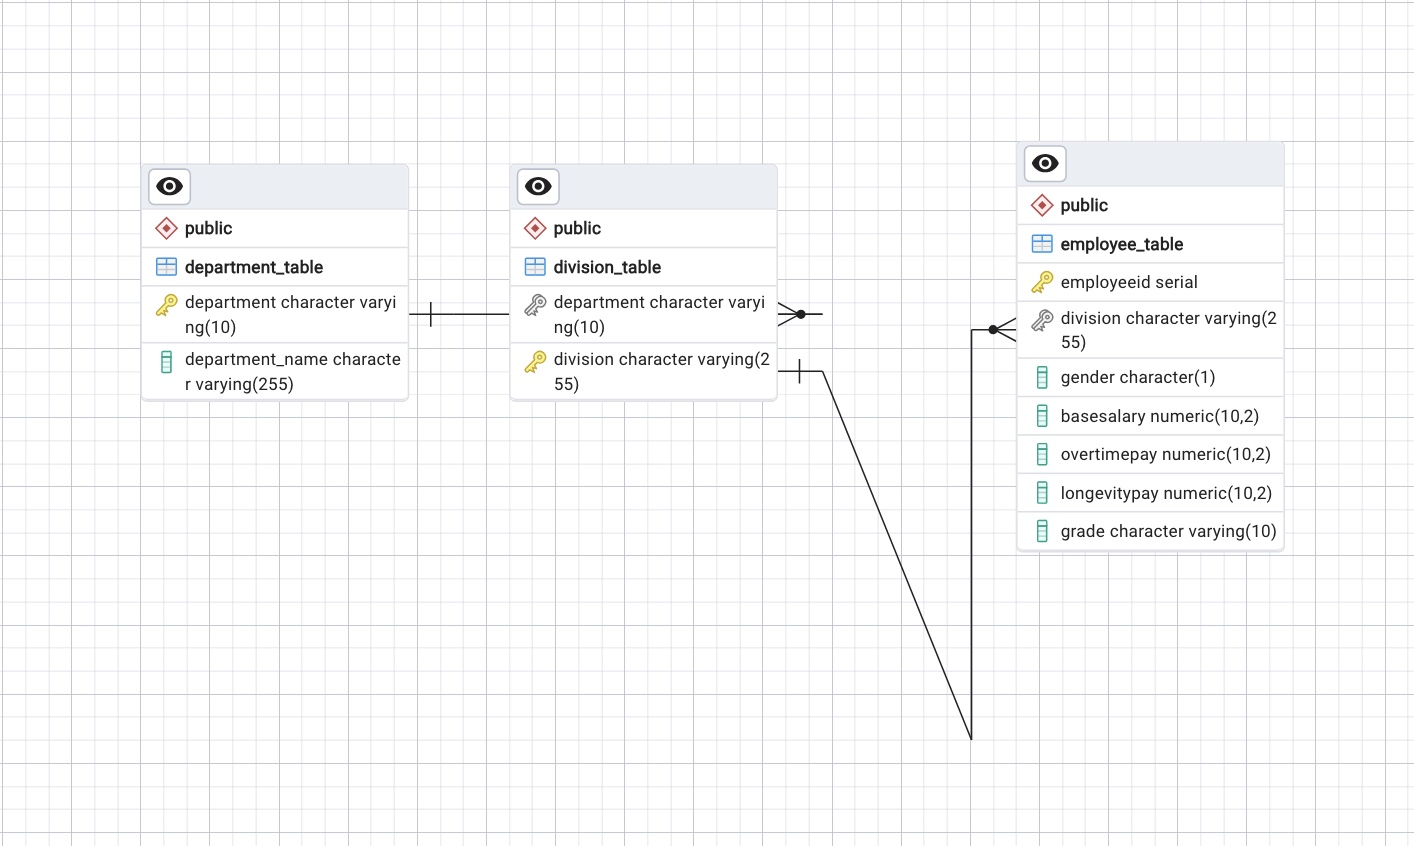

In [124]:

# Display the image
er= image_html
er

SQL statements to create the proposed database and tables in PostgreSQL



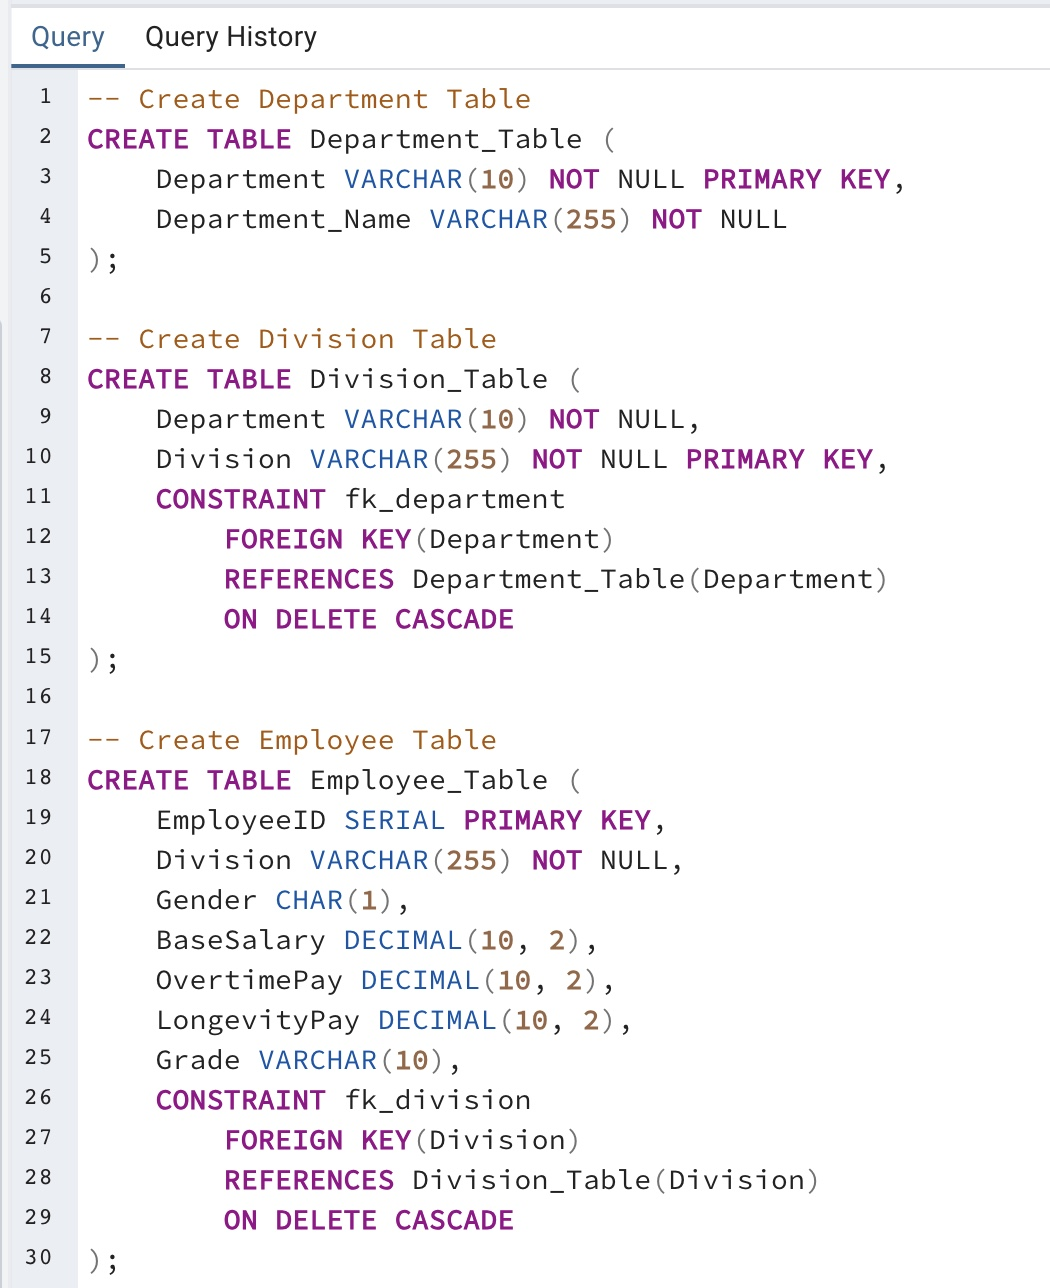

In [129]:
# Display the image
sql

In [111]:
import psycopg2


def create_connection(db_name, db_user, db_password, db_host, db_port):
    connection = psycopg2.connect(
        database=db_name,
        user=db_user,
        password=db_password,
        host=db_host,
        port=db_port,)
    print("Connection to PostgreSQL DB successful")
    return connection


db_name = "salaries"
db_user = "postgres"
db_password = "0369"
db_host = "localhost"  
db_port = "5432"  

connection = create_connection(db_name, db_user, db_password, db_host, db_port)


Connection to PostgreSQL DB successful


In [90]:
df = pd.read_csv("data.csv") 

In [91]:
df.head()

,Department,Department_Name,Division,Gender,Base_Salary,Overtime_Pay,Longevity_Pay,Grade
0,ABS,Alcohol Beverage Services,ABS 85 Administration,M,175873.000,0.00,0.0,M2
1,ABS,Alcohol Beverage Services,ABS 85 Administration,M,145613.360,0.00,0.0,M3
2,ABS,Alcohol Beverage Services,ABS 85 Administration,F,136970.000,0.00,0.0,M3
3,ABS,Alcohol Beverage Services,ABS 85 Administrative Services,F,89432.694,0.00,2490.0,21
4,ABS,Alcohol Beverage Services,ABS 85 Administrative Services,F,78947.000,456.68,6257.7,16


In [4]:
cursor = connection.cursor()

In [92]:
df_dept = df[["Department","Department_Name"]].drop_duplicates()

In [93]:
df_division = df[["Department","Division"]].drop_duplicates()

In [94]:
df_employees = df[["Division","Gender","Base_Salary","Overtime_Pay","Longevity_Pay","Grade"]]

In [95]:
df_dept.columns

Index(['Department', 'Department_Name'], dtype='object')

In [96]:
df_division.columns

Index(['Department', 'Division'], dtype='object')

In [97]:
df_employees.columns

Index(['Division', 'Gender', 'Base_Salary', 'Overtime_Pay', 'Longevity_Pay',
       'Grade'],
      dtype='object')

In [15]:
from io import StringIO


In [16]:
# Function to copy data from a dataframe to a table
def copy_from_stringio(conn, df, table):
    """
    Here we are going save the dataframe in memory and use copy_from() to copy it to the table
    """
    # Save dataframe to an in memory buffer
    buffer = StringIO()
    df.to_csv(buffer, index=False, header=False)
    buffer.seek(0)
    
    cursor = connection.cursor()
    try:
        cursor.copy_from(buffer, table, sep=",", null="")
        conn.commit()
    except (Exception, psycopg2.DatabaseError) as error:
        print("Error: %s" % error)
        conn.rollback()
        cursor.close()
        return 1
    print("copy_from_stringio() done")
    cursor.close()

In [98]:
# Populate department table
#copy_from_stringio(connection, df_dept, 'department_table')


In [100]:
import csv
"""
df_division.to_csv('division.csv', index=False, quoting=csv.QUOTE_NONNUMERIC)
with open('division.csv', 'r') as f:
    # Use copy_expert to load the CSV data into the table
    cursor.copy_expert("COPY division_table FROM STDIN WITH CSV HEADER QUOTE '\"'", f)
# Commit the transaction and close the connection
connection.commit()
"""

'\ndf_division.to_csv(\'division.csv\', index=False, quoting=csv.QUOTE_NONNUMERIC)\nwith open(\'division.csv\', \'r\') as f:\n    # Use copy_expert to load the CSV data into the table\n    cursor.copy_expert("COPY division_table FROM STDIN WITH CSV HEADER QUOTE \'"\'", f)\n# Commit the transaction and close the connection\nconnection.commit()\n'

In [101]:
"""
cursor.close()
cursor= connection.cursor()
connection.rollback()
"""

'\ncursor.close()\ncursor= connection.cursor()\nconnection.rollback()\n'

In [104]:
'''
df_employees.to_csv('employees.csv', index=False, quoting=csv.QUOTE_NONNUMERIC)
with open('employees.csv', 'r') as f:
    # Use copy_expert to load the CSV data into the table
    cursor.copy_expert(sql="""
        COPY employee_table (division, gender, basesalary, overtimepay, longevitypay, grade) FROM STDIN WITH CSV HEADER QUOTE '\"' """, file=f)

# Commit the transaction and close the connection
connection.commit()
'''

'\ndf_employees.to_csv(\'employees.csv\', index=False, quoting=csv.QUOTE_NONNUMERIC)\nwith open(\'employees.csv\', \'r\') as f:\n    # Use copy_expert to load the CSV data into the table\n    cursor.copy_expert(sql="""\n        COPY employee_table (division, gender, basesalary, overtimepay, longevitypay, grade) FROM STDIN WITH CSV HEADER QUOTE \'"\' """, file=f)\n\n# Commit the transaction and close the connection\nconnection.commit()\n'

In [105]:
# Query to select all table names in the 'public' schema
cursor.execute("""
    SELECT table_name 
    FROM information_schema.tables 
    WHERE table_schema = 'public'
""")

# Fetch all the resulting table names
tables = cursor.fetchall()

# Print the names of the tables
for table in tables:
    print(table[0])


department_table
division_table
employee_table


In [108]:
cursor.execute('SELECT * FROM employee_table;')
rows = cursor.fetchall()
len(rows)

10291

In [113]:
cursor = connection.cursor()

# EDA

In [114]:
summary_stats_all = df_employees.describe(include='all')
print(summary_stats_all)

                             Division Gender    Base_Salary   Overtime_Pay  \
count                           10291  10291   10291.000000   10291.000000   
unique                            627      2            NaN            NaN   
top     HHS 60 School Health Services      M            NaN            NaN   
freq                              399   5929            NaN            NaN   
mean                              NaN    NaN   90312.165744    8081.288954   
std                               NaN    NaN   31240.842929   16491.833017   
min                               NaN    NaN   11147.240000       0.000000   
25%                               NaN    NaN   70023.000000       0.000000   
50%                               NaN    NaN   87328.000000     258.420000   
75%                               NaN    NaN  108084.000000    9190.970000   
max                               NaN    NaN  292000.000000  227428.990000   

        Longevity_Pay  Grade  
count    10291.000000  10258  
u

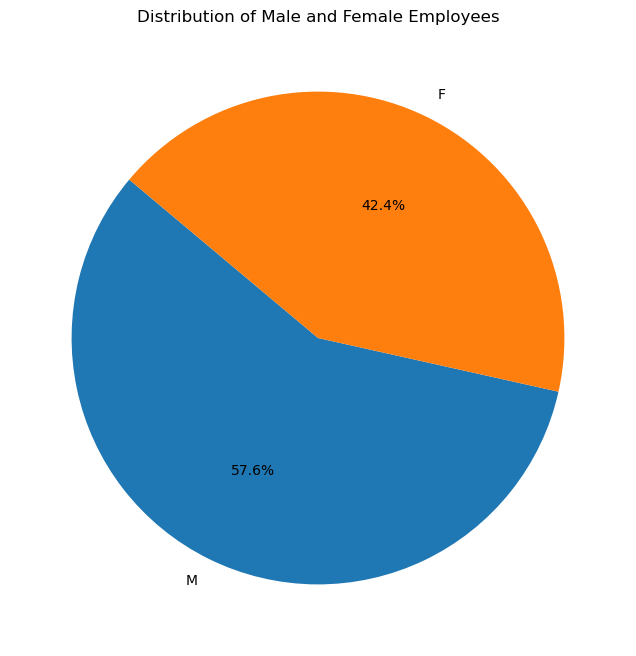

In [115]:
import matplotlib.pyplot as plt
# Executing the SQL query to count the number of male and female employees
cursor.execute("SELECT gender, COUNT(*) FROM employee_table GROUP BY gender;")

# Fetching the results
gender_counts = cursor.fetchall()

# Data for plotting
genders = [row[0] for row in gender_counts]
counts = [row[1] for row in gender_counts]

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=genders, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Male and Female Employees')
plt.show()


As we can see, based on the dataset there is no significant difference between male and female employees in the organization

In [116]:
cursor= connection.cursor()

/var/folders/7k/3wfhbncj4qs911nd5wx5t3sh0000gn/T/ipykernel_79551/3711460378.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_gender_salary = pd.read_sql(gender_salary_query, connection)


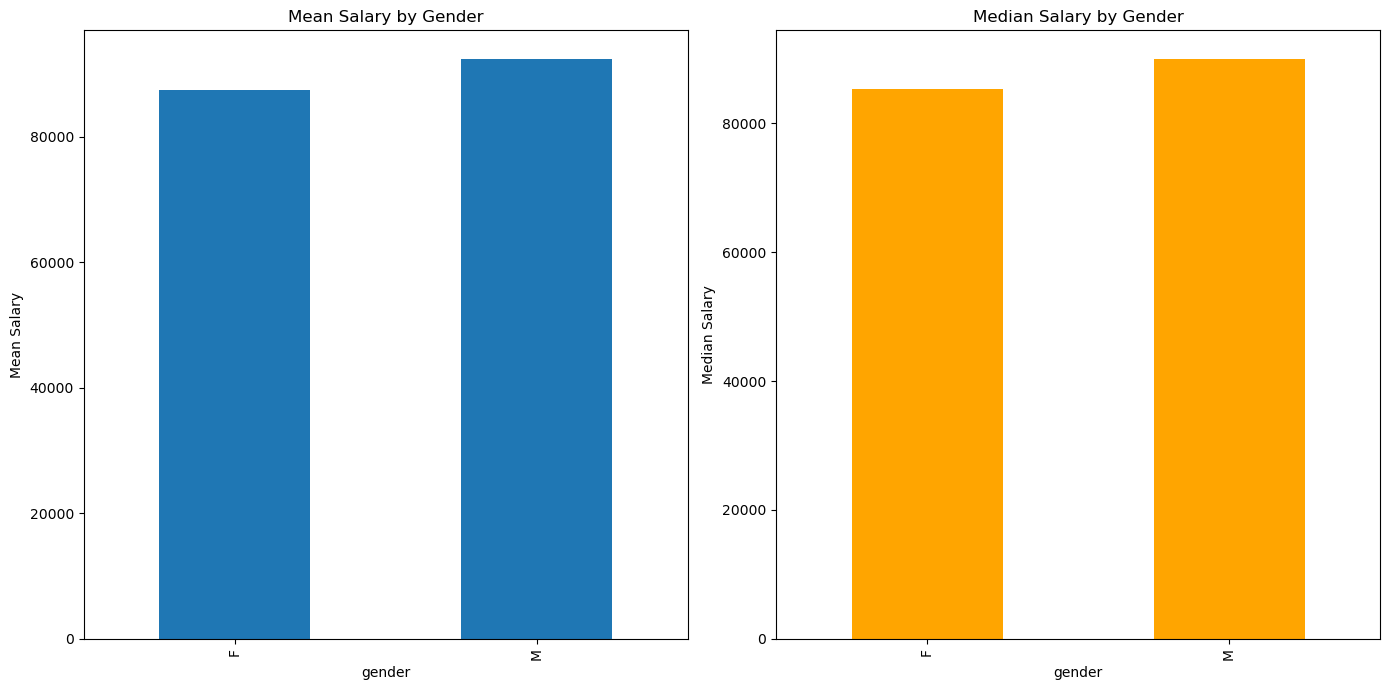

In [117]:
# SQL query to fetch gender count
gender_count_query = "SELECT gender, COUNT(*) FROM employee_table GROUP BY gender;"
gender_salary_query = "SELECT gender, basesalary FROM employee_table;"


# Fetching the base salary data
df_gender_salary = pd.read_sql(gender_salary_query, connection)


# Plotting the visualization for mean and median pay between genders
plt.figure(figsize=(14, 7))

# Mean salaries
plt.subplot(1, 2, 1)
df_gender_salary.groupby('gender')['basesalary'].mean().plot(kind='bar')
plt.title('Mean Salary by Gender')
plt.ylabel('Mean Salary')

# Median salaries
plt.subplot(1, 2, 2)
df_gender_salary.groupby('gender')['basesalary'].median().plot(kind='bar', color='orange')
plt.title('Median Salary by Gender')
plt.ylabel('Median Salary')

plt.tight_layout()
plt.show()


We can see that there is a difference in both mean and median pay for male and female employees but we cannot conclude anything with confidence based on just the mean and median bar plots.

/var/folders/7k/3wfhbncj4qs911nd5wx5t3sh0000gn/T/ipykernel_79551/2535468715.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql, connection)


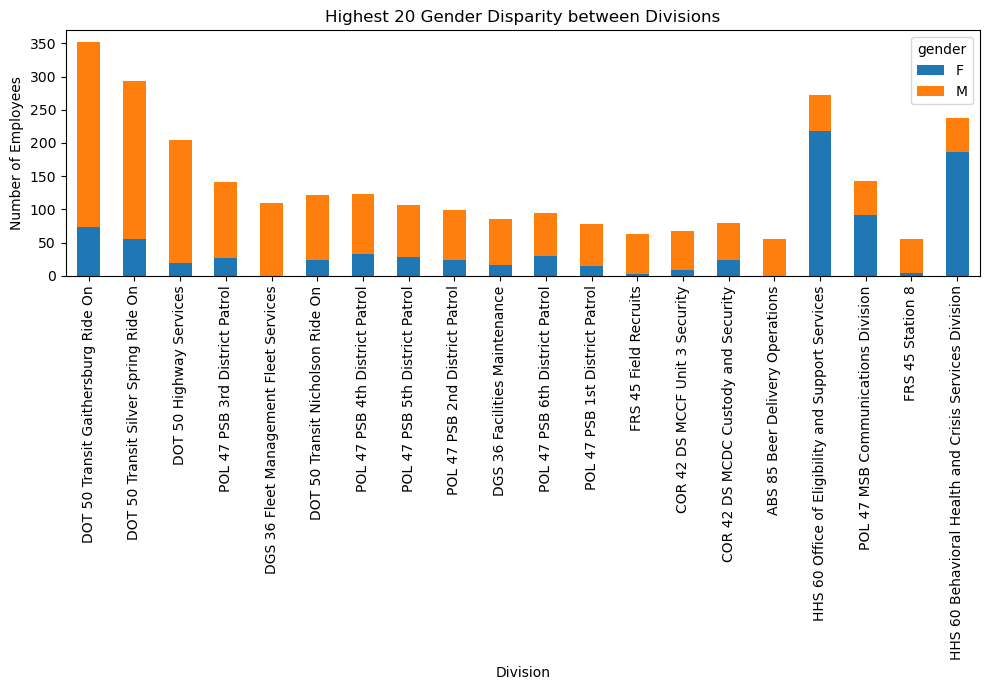

In [118]:
# Query to find disparities in roles based on gender
cursor= connection.cursor()
# SQL query to find the disparities in roles based on their gender
# Adjust the table name and column names according to your database schema
sql = """
SELECT Division, Gender, COUNT(*) as EmployeeCount
FROM employee_table
GROUP BY Division, Gender
ORDER BY Division;
"""

# Read the query result directly into a pandas DataFrame
df = pd.read_sql_query(sql, connection)

# Pivot the DataFrame to prepare it for the stacked bar chart
pivot_df = df.pivot(index='division', columns='gender', values='employeecount').fillna(0)

# Plot a stacked bar chart
pivot_df = pivot_df.sort_values(by=['M', 'F'], ascending=False).head(20)  # Adjust here if you have different gender labels
pivot_df.plot(kind='bar', stacked=True, figsize=(10, 7))

# Set the labels and title
plt.xlabel('Division')
plt.ylabel('Number of Employees')
plt.title('Highest 20 Gender Disparity between Divisions')

# Show the plot
plt.tight_layout()
plt.show()
# Close the cursor and the connection
cursor.close()


This plot illustrates the number of male and female employees in the top 20 divisions within an organization that have the highest disparity in gender representation. Each bar represents a division, and the length of each colored segment in the bar shows the number of employees of that gender within the division.
From this visualization, we can infer that some divisions have a considerable imbalance in gender representation, which could be a point of concern for the organization if they are striving for gender parity.

/var/folders/7k/3wfhbncj4qs911nd5wx5t3sh0000gn/T/ipykernel_79551/2893749034.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)
/var/folders/7k/3wfhbncj4qs911nd5wx5t3sh0000gn/T/ipykernel_79551/2893749034.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['pay_difference'] = (filtered_df[('mean_salary', 'F')] - filtered_df[('mean_salary', 'M')]).abs()


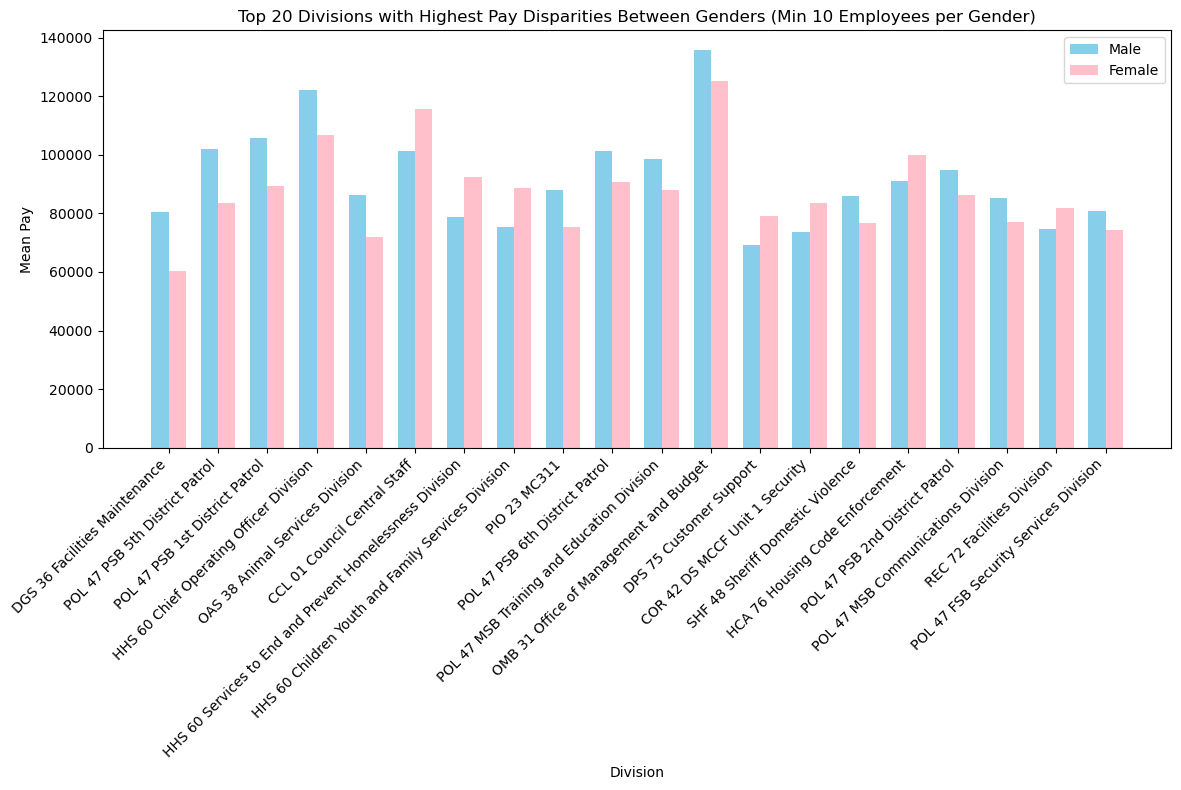

In [84]:
query = """
SELECT division, gender, AVG(basesalary) as mean_salary, COUNT(*) as employee_count
FROM employee_table
GROUP BY division, gender
ORDER BY division, gender;
"""

# Execute the query and load the data into a pandas DataFrame
df = pd.read_sql_query(query, connection)


# Filter out divisions with less than 10 employees for each gender
# First, pivot the DataFrame
pivot_df = df.pivot_table(values=['mean_salary', 'employee_count'], index='division', columns='gender', aggfunc='first')

# Apply the filter for at least 10 male and 10 female employees
filtered_df = pivot_df[(pivot_df[('employee_count', 'M')] >= 10) & (pivot_df[('employee_count', 'F')] >= 10)]

# Calculate the pay difference and get the top 20 divisions with the highest absolute pay disparities
filtered_df['pay_difference'] = (filtered_df[('mean_salary', 'F')] - filtered_df[('mean_salary', 'M')]).abs()
top_20_disparities = filtered_df.sort_values(by='pay_difference', ascending=False).head(20)

# Plotting the mean pay of male and female employees in the top 20 filtered divisions
fig, ax = plt.subplots(figsize=(12, 8))

# Calculate bar positions
bar_width = 0.35
index = np.arange(len(top_20_disparities))

# Plotting both 'M' and 'F' mean salaries
bars1 = ax.bar(index - bar_width/2, top_20_disparities[('mean_salary', 'M')], bar_width, label='Male', color='skyblue')
bars2 = ax.bar(index + bar_width/2, top_20_disparities[('mean_salary', 'F')], bar_width, label='Female', color='pink')

# Adding labels, title, and custom x-axis tick labels
ax.set_xlabel('Division')
ax.set_ylabel('Mean Pay')
ax.set_title('Top 20 Divisions with Highest Pay Disparities Between Genders (Min 10 Employees per Gender)')
ax.set_xticks(index)
ax.set_xticklabels(top_20_disparities.index, rotation=45, ha="right")
ax.legend()

# Adding a legend and making the layout fit
fig.tight_layout()

plt.show()

This bar chart depicts the mean pay for male and female employees across the top 20 divisions with the greatest pay disparities, where each division has a minimum of 10 employees of each gender. I considered a threshold of 10 male and 10 female employees to come up in the result as if there are very few employees in few divisions like a director or manager, this can show skewed results, therefore, we set a threshold to come up in the result.

In nearly all of the displayed divisions, there appears to be a difference in mean pay between male and female employees. In most cases, the blue bars (male employees) are taller than the pink bars (female employees), suggesting that, on average, male employees are paid more than their female counterparts in those divisions.

While most divisions show higher mean pay for males, there are a few divisions where the mean pay for females is slightly higher (where the pink bar is taller). This indicates that the direction of pay disparity is not consistent across all divisions.

# Conclusion

Drawing on the series of visualizations, it is clear that there are major gender differences inside the business, both in terms of compensation and role allocation. The stacked bar chart clearly shows the disparity in the number of males and females across divisions, indicating a potential imbalance in role assignment or promotion processes that favor one gender. Meanwhile, comparing mean earnings in the top divisions with the greatest pay disparities emphasizes the existence of a gender pay gap.

In divisions where there is a significant discrepancy in average salaries between male and female employees, this shows an underlying systemic issue that goes beyond coincidence. Such discrepancies, visible across various divisions and not limited to isolated cases, indicate a widespread trend of gender discrimination in the workplace.

Finally, the data visualizations serve as a call to action, emphasizing the importance of conducting a thorough assessment of recruiting, promotion, and remuneration practices in order to address and fix the discovered discrepancies. Without intervention, these differences not only undercut the concept of equal compensation for equal labor, but they also reflect and may exacerbate a larger societal issue of gender inequality.